# KNN

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('Resources/DATA/gene_expression.csv')

In [7]:
df.head(1)

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1


(4.0, 8.0)

C:\Users\ELCOT\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


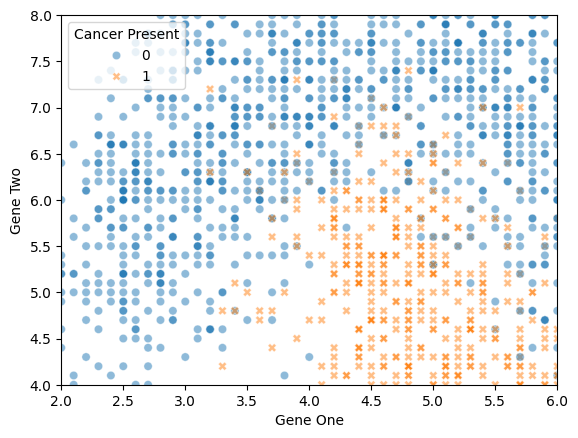

In [17]:
sns.scatterplot(x='Gene One', y = 'Gene Two', data =df, hue='Cancer Present', alpha=0.5, style='Cancer Present')
plt.xlim(2, 6)
plt.ylim(4,8)

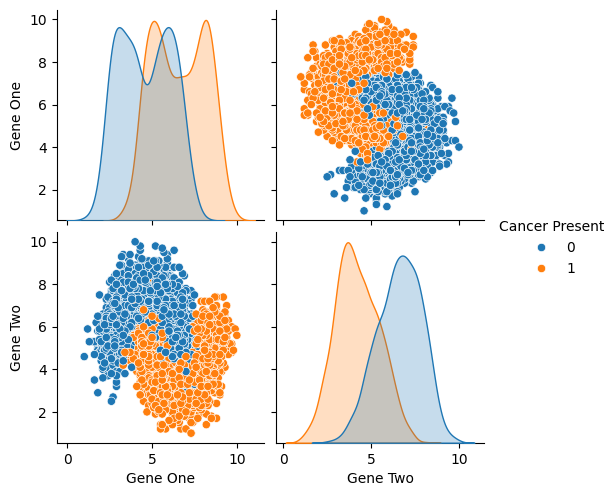

In [18]:
sns.pairplot(data=df, hue='Cancer Present')

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [22]:
x = df.drop('Cancer Present', axis=1)
y = df['Cancer Present']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state=42)

In [30]:
scaler = StandardScaler()

In [34]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [1]:
# help(KNeighborsClassifier)

In [50]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [51]:
knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [52]:
y_pred = knn_model.predict(scaled_X_test)

In [53]:
from sklearn.metrics import confusion_matrix, classification_report

In [54]:
confusion_matrix(y_test, y_pred)

array([[467,  43],
       [ 58, 422]])

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       510
           1       0.91      0.88      0.89       480

    accuracy                           0.90       990
   macro avg       0.90      0.90      0.90       990
weighted avg       0.90      0.90      0.90       990



In [61]:
from sklearn.metrics import accuracy_score

In [63]:
1 - accuracy_score(y_test, y_pred)

0.10202020202020201

In [64]:
test_error_rates = []

for k in range(1, 30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train, y_train)
    
    y_pred = knn_model.predict(scaled_X_test)

    test_error = 1 - accuracy_score(y_test, y_pred)
    
    test_error_rates.append(test_error)
    

In [65]:
test_error_rates

[0.10202020202020201,
 0.10303030303030303,
 0.07878787878787874,
 0.07878787878787874,
 0.07272727272727275,
 0.06666666666666665,
 0.0636363636363636,
 0.06161616161616157,
 0.06565656565656564,
 0.06666666666666665,
 0.06262626262626259,
 0.06464646464646462,
 0.06464646464646462,
 0.05858585858585863,
 0.05555555555555558,
 0.05757575757575761,
 0.05757575757575761,
 0.05555555555555558,
 0.05757575757575761,
 0.054545454545454564,
 0.0565656565656566,
 0.05555555555555558,
 0.05858585858585863,
 0.05858585858585863,
 0.05959595959595965,
 0.0565656565656566,
 0.05858585858585863,
 0.05757575757575761,
 0.05959595959595965]

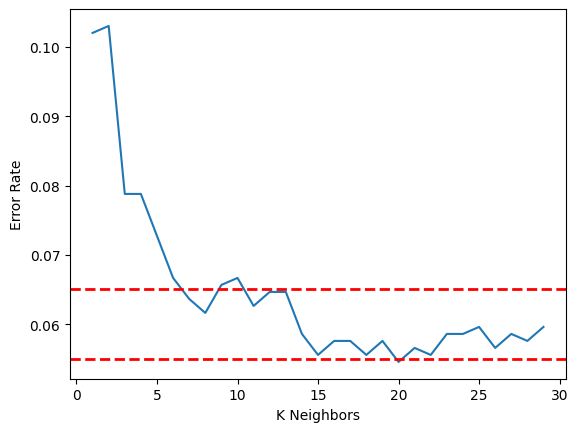

In [71]:
plt.plot(range(1, 30), test_error_rates)
plt.ylabel('Error Rate')
plt.xlabel('K Neighbors')
plt.axhline(y=0.065, color='r', linestyle='--', linewidth=2)
plt.axhline(y=0.055, color='r', linestyle='--', linewidth=2)
# plt.xlim(0, 10)


In [72]:
scaler = StandardScaler()
knn = KNeighborsClassifier()

In [75]:
operations = [('scaler', scaler), ('knn', knn)]

In [76]:
from sklearn.pipeline import Pipeline

In [77]:
pipe = Pipeline(operations)

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
k_values = list(range(1, 20))

In [74]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [80]:
param_grid = {'knn__n_neighbors':k_values}

In [81]:
full_cv_classifier = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

In [82]:
full_cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [84]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=19))],
 'transform_input': None,
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=19),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 19,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [86]:
y_pred = full_cv_classifier.predict(X_test)

In [87]:
accuracy_score(y_test, y_pred)

0.9424242424242424

In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       510
           1       0.95      0.93      0.94       480

    accuracy                           0.94       990
   macro avg       0.94      0.94      0.94       990
weighted avg       0.94      0.94      0.94       990



In [89]:
new_patient = [[3.8, 6.4]]

In [90]:
full_cv_classifier.predict(new_patient)

C:\Users\ELCOT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])